In [27]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk as nltk
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns 




# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

!pip install pandasql 

In [3]:
dtrain=pd.read_csv(r'/Users/rohit/Downloads/Deep Learning  Research Paper /News_Dataset/telugu_news/train_telugu_news.csv')
dtest=pd.read_csv(r'/Users/rohit/Downloads/Deep Learning  Research Paper /News_Dataset/telugu_news/test_telugu_news.csv')

In [4]:
dtrain 
dtest 

,SNo,date,heading,body,topic
0,7771,19-05-2017 13:44:10,కేశవ,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...,entertainment
1,9591,01-08-2017 13:58:24,డబ్బుల కోసం ప్రాణాల మీదకు తెచ్చుకుంటారా.. హీరో...,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...,entertainment
2,12622,05-04-2017 00:31:58,దక్షిణాదిన బీజేపీ పప్పులుడకవ్‌,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...,nation
3,16401,30-08-2017 03:34:37,పీఎస్‌ఎల్వీ-సీ39కి గ్రీన్‌సిగ్నల్‌,నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరి...,nation
4,10422,10-04-2017 09:00:48,ఏయ్ జయప్రకాష్ అనే కేక వినిపించింది.. వెనక్కి త...,‘ఏమి రా... అబ్బి... యాడికి పోయినావు’ అంటూ రాయ...,entertainment
...,...,...,...,...,...
4324,4093,18-11-2017 01:17:03,వర్గ హత్యలు ఆగాలి!,\nమొన్న త్రిసూరులో పట్టపగలు ఆరెస్సెస్ కార్యకర్...,editorial
4325,13874,22-03-2017 19:02:03,'ఫేస్‌బుక్‌'పై నిషేధం..?,ఇస్లామాబాద్: దైవదూషణకు సంబంధించిన సమాచారానికి ...,nation
4326,15364,15-06-2017 03:18:08,అమెరికా చట్టసభ్యుడిపై కాల్పులు,"ఒక రిపబ్లికన్‌ సభ్యుడు, నలుగురు అధికారులకు గాయ...",nation
4327,17166,18-05-2017 19:22:27,కోటి రూపాయల.. రద్దైన పాత కరెన్సీ స్వాధీనం,"థానే: కోటి రూపాయల విలువైన రద్దైన పాత రూ.1000, ...",nation


In [5]:
dtest.head(100)

,SNo,date,heading,body,topic
0,7771,19-05-2017 13:44:10,కేశవ,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...,entertainment
1,9591,01-08-2017 13:58:24,డబ్బుల కోసం ప్రాణాల మీదకు తెచ్చుకుంటారా.. హీరో...,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...,entertainment
2,12622,05-04-2017 00:31:58,దక్షిణాదిన బీజేపీ పప్పులుడకవ్‌,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...,nation
3,16401,30-08-2017 03:34:37,పీఎస్‌ఎల్వీ-సీ39కి గ్రీన్‌సిగ్నల్‌,నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరి...,nation
4,10422,10-04-2017 09:00:48,ఏయ్ జయప్రకాష్ అనే కేక వినిపించింది.. వెనక్కి త...,‘ఏమి రా... అబ్బి... యాడికి పోయినావు’ అంటూ రాయ...,entertainment
...,...,...,...,...,...
95,5776,21-11-2017 10:37:29,పవన్‌ని సన్నీలియోన్‌తో పోలుస్తూ వర్మ ఘాటు వ్యా...,లండన్ నుంచి పవన్ హైదరాబాద్‌కు సోమవారం వచ్చారు...,entertainment
96,19779,12-10-2017 01:40:52,హాకీ జట్టు శుభారంభం,\n5-1తో జపాన్‌పై గెలుపు.. ఆసియా కప్‌ఢాకా: ప్రత...,sports
97,12235,07-03-2017 00:58:03,"విద్యుత్‌కు, పండగలకు ముడిపెట్టిన మహానుభావుడు మ...",\nజాన్‌పూర్‌: ప్రధాని మోదీని లక్ష్యంగా చేసుకున...,nation
98,6519,18-09-2017 15:35:34,విజయ్‌మాల్యా కొడుకుతో హీరోయిన్ ప్రేమ వ్యవహారం!,సోనాల్‌ చౌహాన్‌ గుర్తుందిగా....బక్కపలచగా ఉండి ...,entertainment


In [6]:
dtest.tail(100)

,SNo,date,heading,body,topic
4229,21054,22-11-2017 01:32:47,తెలంగాణకు స్వర్ణం,జాతీయ జూనియర్‌ సాఫ్ట్‌బాల్‌ చాంపియన్‌షిప్‌తూప...,sports
4230,4604,05-06-2017 13:32:00,జూన్ 6న విడుదల కానున్న నేనే రాజు నేనే మంత్రి ట...,"జయం, నువ్వునేను వంటి చిత్రాలతో అప్పట్లో అందరి ...",entertainment
4231,12225,23-01-2017 02:24:28,అసోంలో రైఫిల్స్‌ వాహనంపై దాడి,\n ఇద్దరు జవాన్లు మృతి.. ఇద్దరు ఉగ్రవాదులూ హతం...,nation
4232,114,23-11-2017 23:47:53,ముగింపు సెషన్‌ మెరుగు,తిథి: మార్గశిర శుద్ధ షష్ఠి నక్షత్రం: శ్రవణంప...,business
4233,18446,03-12-2017 03:23:57,రాజకీయ నేతలైతే నా దగ్గరకు రావొద్దు,రాజకీయ నేతలు నాకు అక్కర్లేదు. ప్రజల కోసం కష్టప...,nation
...,...,...,...,...,...
4324,4093,18-11-2017 01:17:03,వర్గ హత్యలు ఆగాలి!,\nమొన్న త్రిసూరులో పట్టపగలు ఆరెస్సెస్ కార్యకర్...,editorial
4325,13874,22-03-2017 19:02:03,'ఫేస్‌బుక్‌'పై నిషేధం..?,ఇస్లామాబాద్: దైవదూషణకు సంబంధించిన సమాచారానికి ...,nation
4326,15364,15-06-2017 03:18:08,అమెరికా చట్టసభ్యుడిపై కాల్పులు,"ఒక రిపబ్లికన్‌ సభ్యుడు, నలుగురు అధికారులకు గాయ...",nation
4327,17166,18-05-2017 19:22:27,కోటి రూపాయల.. రద్దైన పాత కరెన్సీ స్వాధీనం,"థానే: కోటి రూపాయల విలువైన రద్దైన పాత రూ.1000, ...",nation


In [7]:
dtrain_new=dtrain.drop(columns='date')
dtest_new=dtest.drop(columns='date')
dtrain_new=dtrain.drop(columns='SNo')
dtest_new=dtest.drop(columns='SNo')

In [8]:
dtrain_new 
dtest_new


,date,heading,body,topic
0,19-05-2017 13:44:10,కేశవ,హీరోగా తెలుగు సినిమాల్లోకి ఎంట్రీ ఇచ్చిన నిఖిల...,entertainment
1,01-08-2017 13:58:24,డబ్బుల కోసం ప్రాణాల మీదకు తెచ్చుకుంటారా.. హీరో...,సినిమాల్లో యాక్షన్ స్టంట్లు చేసేటప్పుడు ఎక్కు...,entertainment
2,05-04-2017 00:31:58,దక్షిణాదిన బీజేపీ పప్పులుడకవ్‌,దక్షిణ భారతాన్ని ఆక్రమించేందుకు బీజేపీ పంచెలు ...,nation
3,30-08-2017 03:34:37,పీఎస్‌ఎల్వీ-సీ39కి గ్రీన్‌సిగ్నల్‌,నేటి మధ్యాహ్నం 1.59కి కౌంట్‌డౌన్‌ షురూశ్రీహరి...,nation
4,10-04-2017 09:00:48,ఏయ్ జయప్రకాష్ అనే కేక వినిపించింది.. వెనక్కి త...,‘ఏమి రా... అబ్బి... యాడికి పోయినావు’ అంటూ రాయ...,entertainment
...,...,...,...,...
4324,18-11-2017 01:17:03,వర్గ హత్యలు ఆగాలి!,\nమొన్న త్రిసూరులో పట్టపగలు ఆరెస్సెస్ కార్యకర్...,editorial
4325,22-03-2017 19:02:03,'ఫేస్‌బుక్‌'పై నిషేధం..?,ఇస్లామాబాద్: దైవదూషణకు సంబంధించిన సమాచారానికి ...,nation
4326,15-06-2017 03:18:08,అమెరికా చట్టసభ్యుడిపై కాల్పులు,"ఒక రిపబ్లికన్‌ సభ్యుడు, నలుగురు అధికారులకు గాయ...",nation
4327,18-05-2017 19:22:27,కోటి రూపాయల.. రద్దైన పాత కరెన్సీ స్వాధీనం,"థానే: కోటి రూపాయల విలువైన రద్దైన పాత రూ.1000, ...",nation


In [9]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Define the Telugu text cleaning function
def clean_telugu_text(text):
  if pd.isna(text):  # Handle missing values
    return ""
  
  text = str(text)  # Convert to string if necessary
  cleaned_text = re.sub(r'[^\u0C00-\u0C7F]', ' ', text)
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

  return cleaned_text

# Load training data
train_data = dtrain_new

# Load testing data
test_data = dtest_new

# Preprocess training data
data = train_data

# Text cleaning (implement Telugu-specific cleaning functions)
data['cleaned_heading'] = data['heading'].apply(clean_telugu_text)
data['cleaned_body'] = data['body'].apply(clean_telugu_text)

# Combine heading and body for feature extraction
data['combined_text'] = data['cleaned_heading'] + ' ' + data['cleaned_body']

# ... rest of your code (label encoding, feature extraction, model training, etc.)

# Preprocess testing data (similar to training data)
test_data = test_data.copy()  # Avoid modifying original data

test_data['cleaned_heading'] = test_data['heading'].apply(clean_telugu_text)
test_data['cleaned_body'] = test_data['body'].apply(clean_telugu_text)

test_data['combined_text'] = test_data['cleaned_heading'] + ' ' + test_data['cleaned_body']

# ... rest of the code for testing data processing


In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

# Load training data
train_data = dtrain_new

# Load testing data
test_data = dtest_new

# Preprocess training data (as shown in previous response)
# Load Telugu news data
data = train_data

# Text cleaning (implement Telugu-specific cleaning functions)
data['cleaned_heading'] = data['heading'].apply(clean_telugu_text)
data['cleaned_body'] = data['body'].apply(clean_telugu_text)

# Combine heading and body for feature extraction
data['combined_text'] = data['cleaned_heading'] + ' ' + data['cleaned_body']

# Label encoding (convert multi-label text to numerical representation)
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['topic'].apply(lambda x: x.split(',')))

# Feature extraction (TF-IDF or word embeddings)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['combined_text'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocess testing data (similar to training data)
# Load Telugu news data
# ... (previous code for training data preprocessing)

# Preprocess testing data (similar to training data)
test_data = test_data.copy()  # Avoid modifying original data

# Text cleaning (implement Telugu-specific cleaning functions)
test_data['cleaned_heading'] = test_data['heading'].apply(clean_telugu_text)
test_data['cleaned_body'] = test_data['body'].apply(clean_telugu_text)

# Combine heading and body for feature extraction
test_data['combined_text'] = test_data['cleaned_heading'] + ' ' + test_data['cleaned_body']

# ... (rest of the code for feature extraction, model training, etc.)



# Label encoding (convert multi-label text to numerical representation)
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['topic'].apply(lambda x: x.split(',')))

# Feature extraction (TF-IDF or word embeddings)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['combined_text'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create feature matrices for both training and testing data
X_train = vectorizer.transform(train_data['combined_text'])
X_test = vectorizer.transform(test_data['combined_text'])

# Convert target labels to numerical format for both datasets
y_train = mlb.transform(train_data['topic'].apply(lambda x: x.split(',')))
y_test = mlb.transform(test_data['topic'].apply(lambda x: x.split(',')))



# Define the multi-output classifier
clf = MultiOutputClassifier(LinearSVC())  # Replace LinearSVC with other classifiers if needed

# Train the model
clf.fit(X_train, y_train)

# ... (rest of the code for prediction and evaluation)

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)




In [11]:
# Create a multi-output classifier
clf = MultiOutputClassifier(LinearSVC())  # Replace with other models as needed

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate performance
from sklearn.metrics import f1_score, hamming_loss, jaccard_score
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Hamming loss:", hamming_loss(y_test, y_pred))
print("Jaccard index:", jaccard_score(y_test, y_pred, average='weighted'))


F1-score: 0.8859073949348614
Hamming loss: 0.044167244167244164
Jaccard index: 0.7970351765240276


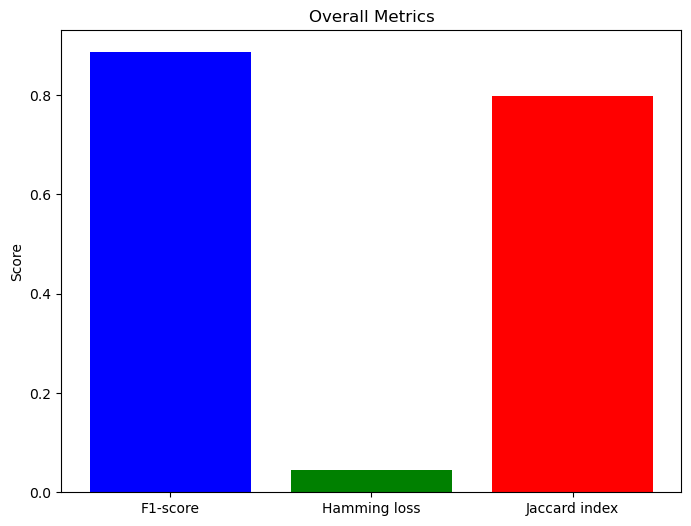

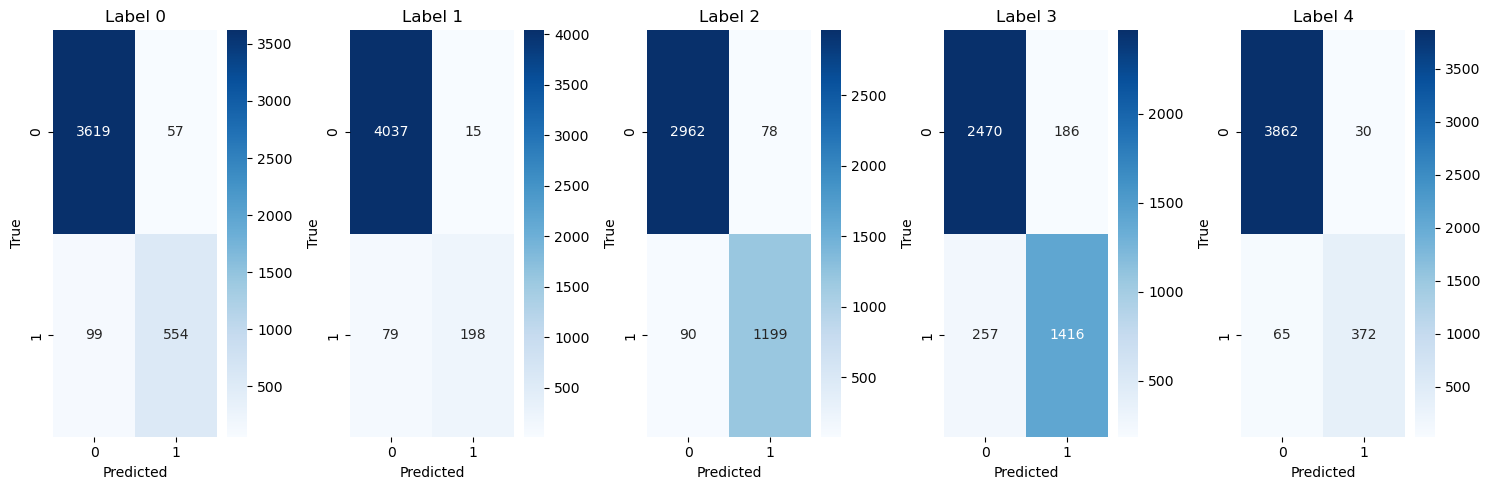

In [12]:
#Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, hamming_loss, jaccard_score

# Assuming you have already trained the classifier and made predictions
# X_train, X_test, y_train, y_test, y_pred should be defined

# Calculate overall metrics
f1 = f1_score(y_test, y_pred, average='weighted')
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='weighted')

# Create a bar chart for the overall metrics
metrics = {'F1-score': f1, 'Hamming loss': hamming, 'Jaccard index': jaccard}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red'])
plt.title('Overall Metrics')
plt.ylabel('Score')
plt.show()

# Generate confusion matrices for each output
num_labels = y_test.shape[1]
fig, axes = plt.subplots(1, num_labels, figsize=(15, 5))

for i in range(num_labels):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Label {i}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

# Single Label (Heading) Analysis 


In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

# Load training data
train_data = dtrain_new

# Load testing data
test_data = dtest_new

# Preprocess training data (as shown in previous response)
# Load Telugu news data
data = train_data

# Text cleaning (implement Telugu-specific cleaning functions)
data['cleaned_heading'] = data['heading'].apply(clean_telugu_text)
data['cleaned_body'] = data['body'].apply(clean_telugu_text)

# Combine heading and body for feature extraction
data['combined_text'] = data['cleaned_heading']

# Label encoding (convert multi-label text to numerical representation)
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['topic'].apply(lambda x: x.split(',')))

# Feature extraction (TF-IDF or word embeddings)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['combined_text'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocess testing data (similar to training data)
# Load Telugu news data
# ... (previous code for training data preprocessing)

# Preprocess testing data (similar to training data)
test_data = test_data.copy()  # Avoid modifying original data

# Text cleaning (implement Telugu-specific cleaning functions)
test_data['cleaned_heading'] = test_data['heading'].apply(clean_telugu_text)
test_data['cleaned_body'] = test_data['body'].apply(clean_telugu_text)

# Combine heading and body for feature extraction
test_data['combined_text'] = test_data['cleaned_heading'] + ' ' + test_data['cleaned_body']

# ... (rest of the code for feature extraction, model training, etc.)



# Label encoding (convert multi-label text to numerical representation)
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['topic'].apply(lambda x: x.split(',')))

# Feature extraction (TF-IDF or word embeddings)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['combined_text'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create feature matrices for both training and testing data
X_train = vectorizer.transform(train_data['combined_text'])
X_test = vectorizer.transform(test_data['combined_text'])

# Convert target labels to numerical format for both datasets
y_train = mlb.transform(train_data['topic'].apply(lambda x: x.split(',')))
y_test = mlb.transform(test_data['topic'].apply(lambda x: x.split(',')))



# Define the multi-output classifier
clf = MultiOutputClassifier(LinearSVC())  # Replace LinearSVC with other classifiers if needed

# Train the model
clf.fit(X_train, y_train)

# ... (rest of the code for prediction and evaluation)

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)




In [14]:
# Create a multi-output classifier
clf = MultiOutputClassifier(LinearSVC())  # Replace with other models as needed

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate performance
from sklearn.metrics import f1_score, hamming_loss, jaccard_score
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Hamming loss:", hamming_loss(y_test, y_pred))
print("Jaccard index:", jaccard_score(y_test, y_pred, average='weighted'))


F1-score: 0.6417577102776832
Hamming loss: 0.13028413028413027
Jaccard index: 0.49759358211737337


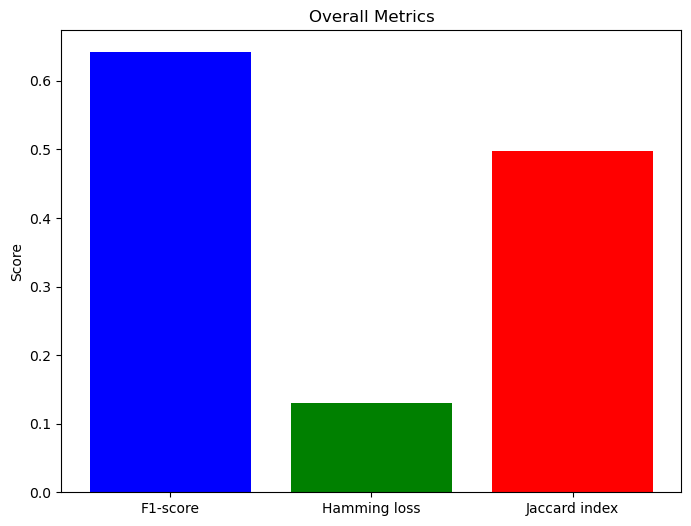

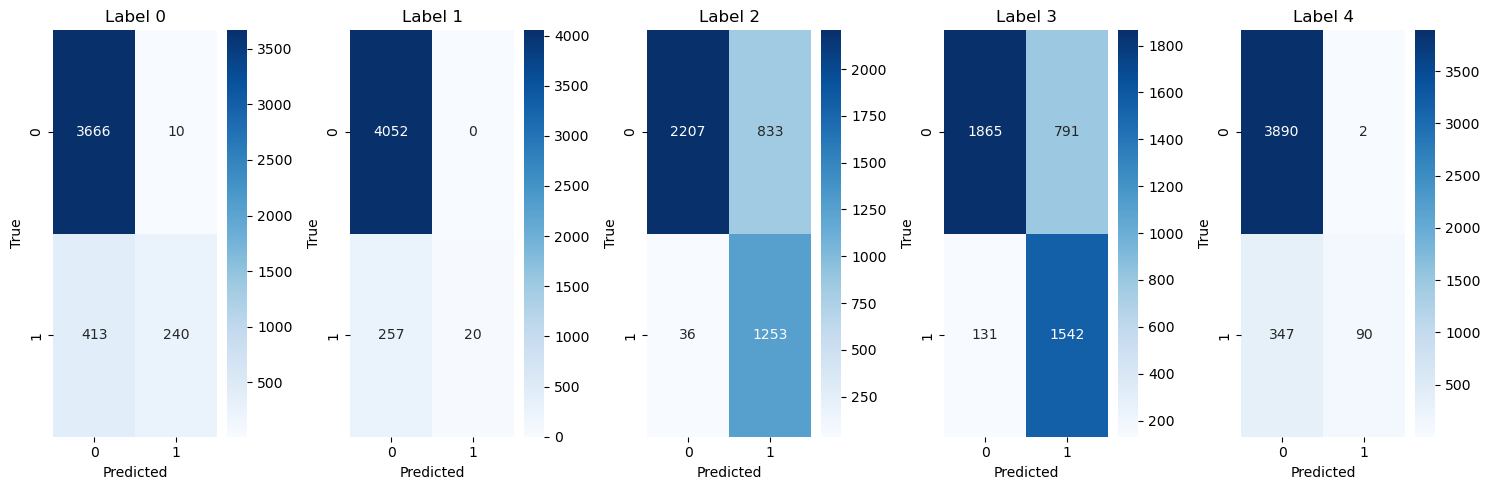

In [15]:
#Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, hamming_loss, jaccard_score

# Assuming you have already trained the classifier and made predictions
# X_train, X_test, y_train, y_test, y_pred should be defined

# Calculate overall metrics
f1 = f1_score(y_test, y_pred, average='weighted')
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='weighted')

# Create a bar chart for the overall metrics
metrics = {'F1-score': f1, 'Hamming loss': hamming, 'Jaccard index': jaccard}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red'])
plt.title('Overall Metrics')
plt.ylabel('Score')
plt.show()

# Generate confusion matrices for each output
num_labels = y_test.shape[1]
fig, axes = plt.subplots(1, num_labels, figsize=(15, 5))

for i in range(num_labels):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Label {i}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

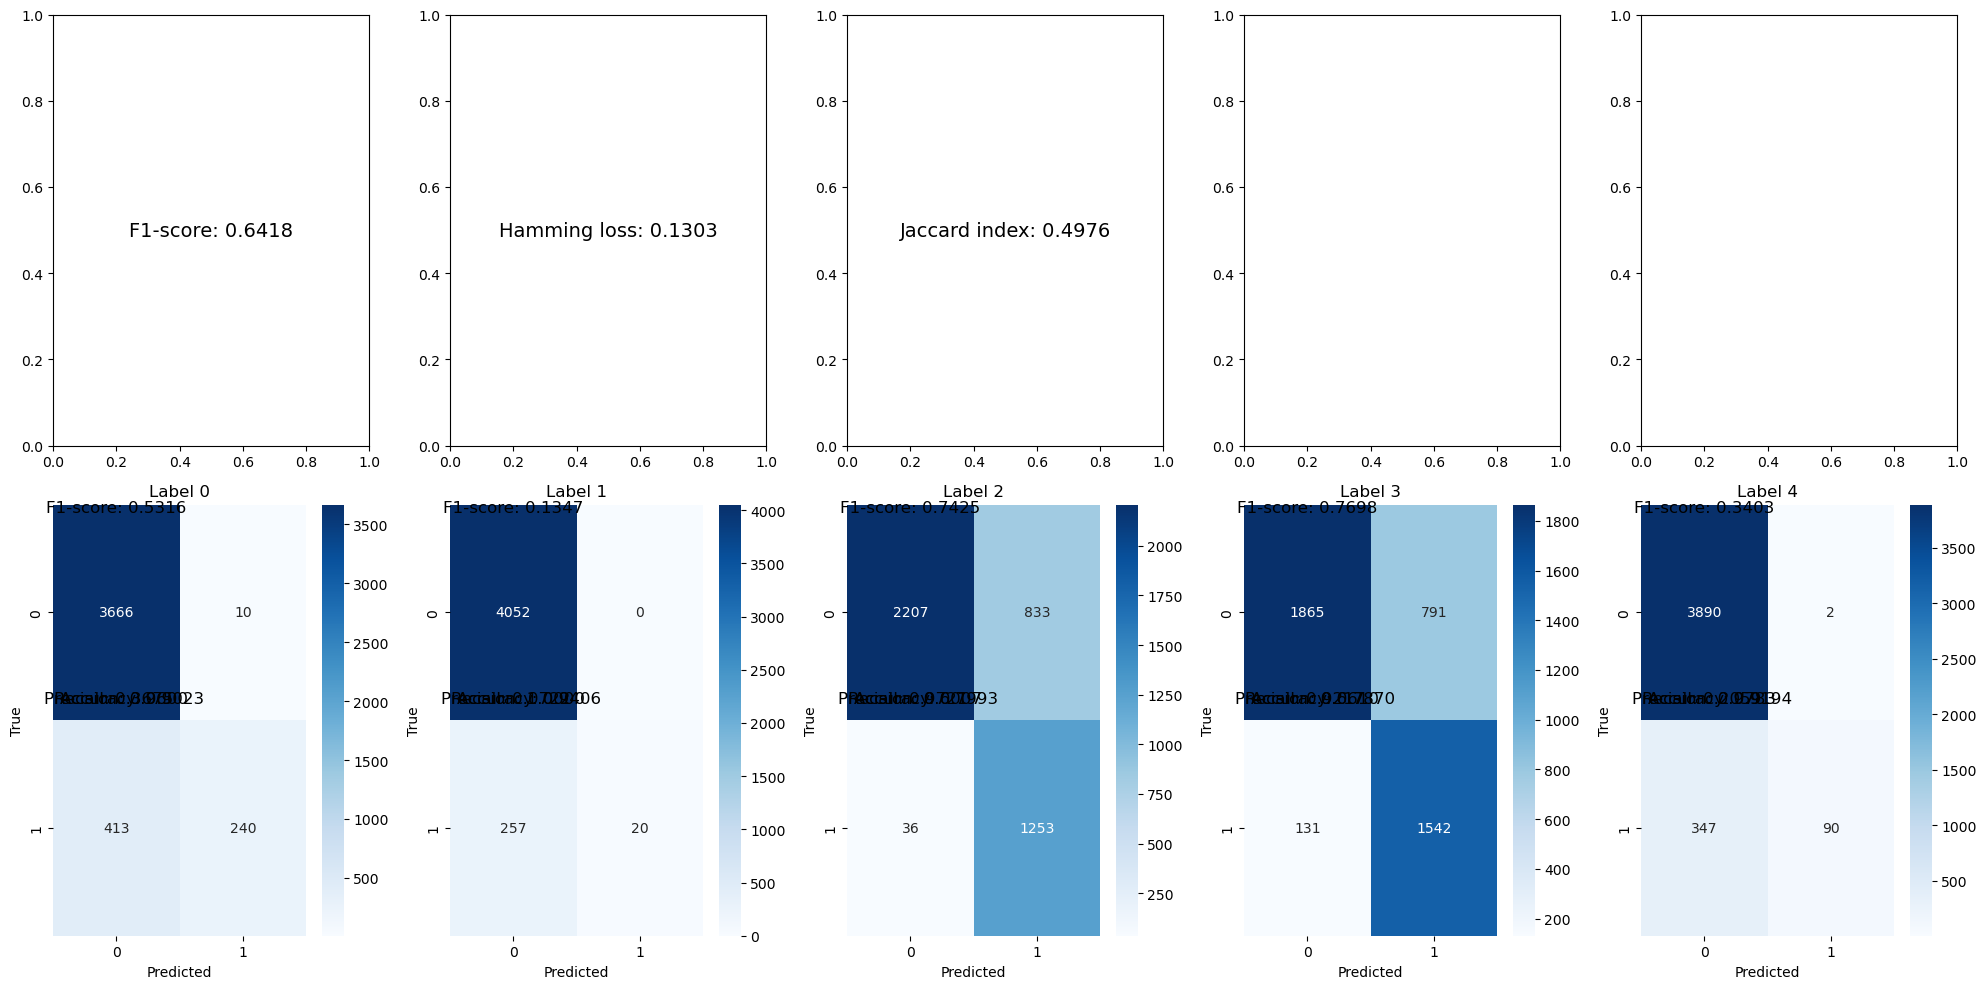

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, hamming_loss, jaccard_score

# Assuming you have already trained the classifier and made predictions
# X_train, X_test, y_train, y_test, y_pred should be defined

# Calculate overall metrics with detailed confusion matrix breakdowns
f1 = f1_score(y_test, y_pred, average='weighted')
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='weighted')

# Create a confusion matrix for each output and calculate specific metrics
num_labels = y_test.shape[1]
fig, axes = plt.subplots(2, num_labels, figsize=(20, 10))  # Adjust figsize as needed

# Overall metrics section
axes[0, 0].text(0.5, 0.5, f'F1-score: {f1:.4f}', ha='center', va='center', fontsize=14)
axes[0, 1].text(0.5, 0.5, f'Hamming loss: {hamming:.4f}', ha='center', va='center', fontsize=14)
axes[0, 2].text(0.5, 0.5, f'Jaccard index: {jaccard:.4f}', ha='center', va='center', fontsize=14)

# Confusion matrix section with additional metrics
for i in range(num_labels):
  cm = confusion_matrix(y_test[:, i], y_pred[:, i])
  sns.heatmap(cm, annot=True, fmt='d', ax=axes[1, i], cmap='Blues')
  axes[1, i].set_title(f'Label {i}')
  axes[1, i].set_xlabel('Predicted')
  axes[1, i].set_ylabel('True')

  # Calculate and display additional metrics per label (consider adding more as needed)
  tn, fp, fn, tp = cm.ravel()
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  precision = tp / (tp + fp) if tp + fp > 0 else 0
  recall = tp / (tp + fn) if tp + fn > 0 else 0
  f1_label = f1_score(y_test[:, i], y_pred[:, i])

  axes[1, i].text(0.05, 0.9, f'Accuracy: {accuracy:.4f}', ha='left', va='center', fontsize=12)
  axes[1, i].text(0.5, 0.9, f'Precision: {precision:.4f}', ha='center', va='center', fontsize=12)
  axes[1, i].text(0.95, 0.9, f'Recall: {recall:.4f}', ha='right', va='center', fontsize=12)
  axes[1, i].text(0.5, 0.05, f'F1-score: {f1_label:.4f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Single label(Body) Analysis 

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC

# Load training data
train_data = dtrain_new

# Load testing data
test_data = dtest_new

# Preprocess training data (as shown in previous response)
# Load Telugu news data
data = train_data

# Text cleaning (implement Telugu-specific cleaning functions)
data['cleaned_heading'] = data['heading'].apply(clean_telugu_text)
data['cleaned_body'] = data['body'].apply(clean_telugu_text)

# Combine heading and body for feature extraction
data['combined_text'] = data['cleaned_body']

# Label encoding (convert multi-label text to numerical representation)
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['topic'].apply(lambda x: x.split(',')))

# Feature extraction (TF-IDF or word embeddings)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['combined_text'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocess testing data (similar to training data)
# Load Telugu news data
# ... (previous code for training data preprocessing)

# Preprocess testing data (similar to training data)
test_data = test_data.copy()  # Avoid modifying original data

# Text cleaning (implement Telugu-specific cleaning functions)
test_data['cleaned_heading'] = test_data['heading'].apply(clean_telugu_text)
test_data['cleaned_body'] = test_data['body'].apply(clean_telugu_text)

# Combine heading and body for feature extraction
test_data['combined_text'] = test_data['cleaned_heading'] + ' ' + test_data['cleaned_body']

# ... (rest of the code for feature extraction, model training, etc.)



# Label encoding (convert multi-label text to numerical representation)
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['topic'].apply(lambda x: x.split(',')))

# Feature extraction (TF-IDF or word embeddings)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['combined_text'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create feature matrices for both training and testing data
X_train = vectorizer.transform(train_data['combined_text'])
X_test = vectorizer.transform(test_data['combined_text'])

# Convert target labels to numerical format for both datasets
y_train = mlb.transform(train_data['topic'].apply(lambda x: x.split(',')))
y_test = mlb.transform(test_data['topic'].apply(lambda x: x.split(',')))



# Define the multi-output classifier
clf = MultiOutputClassifier(LinearSVC())  # Replace LinearSVC with other classifiers if needed

# Train the model
clf.fit(X_train, y_train)

# ... (rest of the code for prediction and evaluation)

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)




In [18]:
# Create a multi-output classifier
clf = MultiOutputClassifier(LinearSVC())  # Replace with other models as needed

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate performance
from sklearn.metrics import f1_score, hamming_loss, jaccard_score
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Hamming loss:", hamming_loss(y_test, y_pred))
print("Jaccard index:", jaccard_score(y_test, y_pred, average='weighted'))


F1-score: 0.8827545394056623
Hamming loss: 0.04527604527604528
Jaccard index: 0.7922372784627291


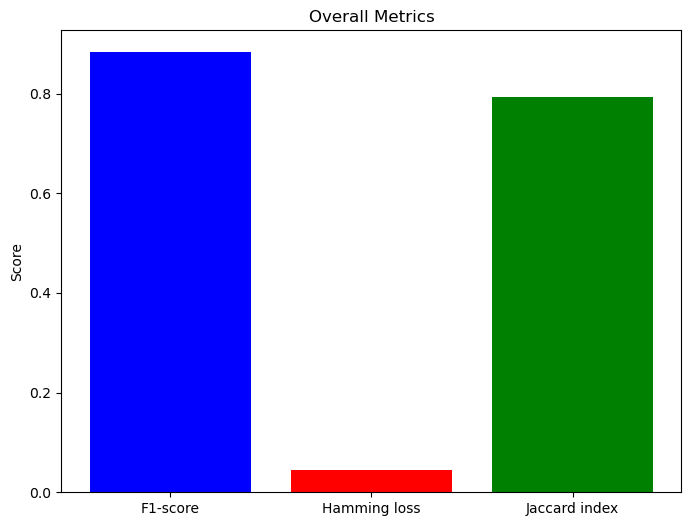

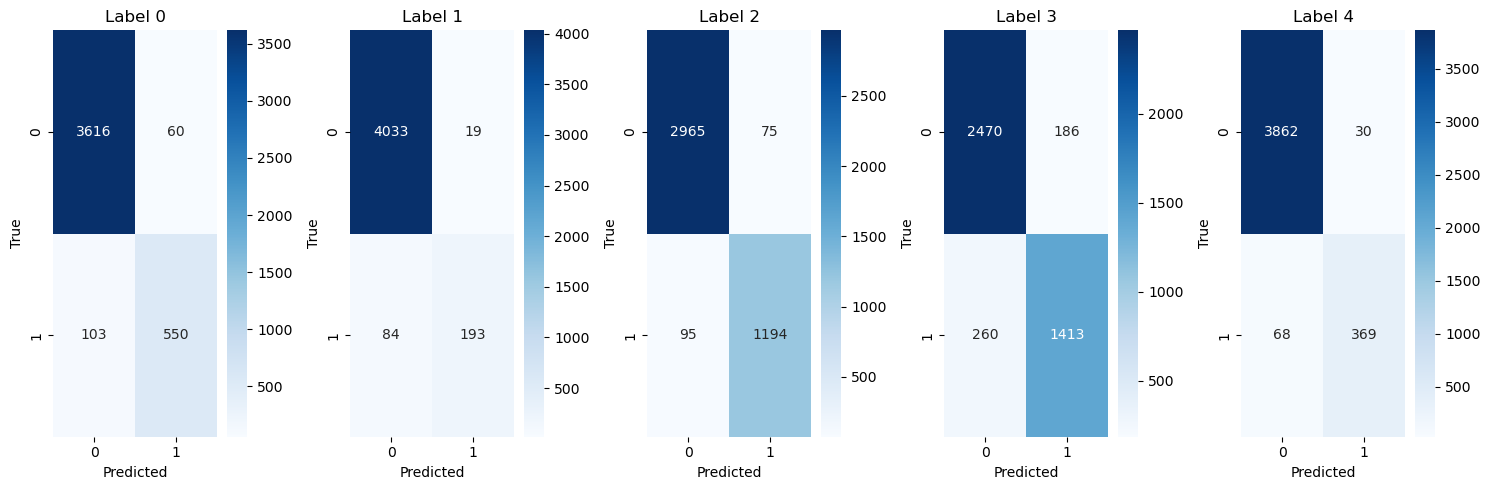

In [19]:
#Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, hamming_loss, jaccard_score

# Assuming you have already trained the classifier and made predictions
# X_train, X_test, y_train, y_test, y_pred should be defined

# Calculate overall metrics
f1 = f1_score(y_test, y_pred, average='weighted')
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='weighted')

# Create a bar chart for the overall metrics
metrics = {'F1-score': f1, 'Hamming loss': hamming, 'Jaccard index': jaccard}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'red', 'green'])
plt.title('Overall Metrics')
plt.ylabel('Score')
plt.show()

# Generate confusion matrices for each output
num_labels = y_test.shape[1]
fig, axes = plt.subplots(1, num_labels, figsize=(15, 5))

for i in range(num_labels):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Label {i}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

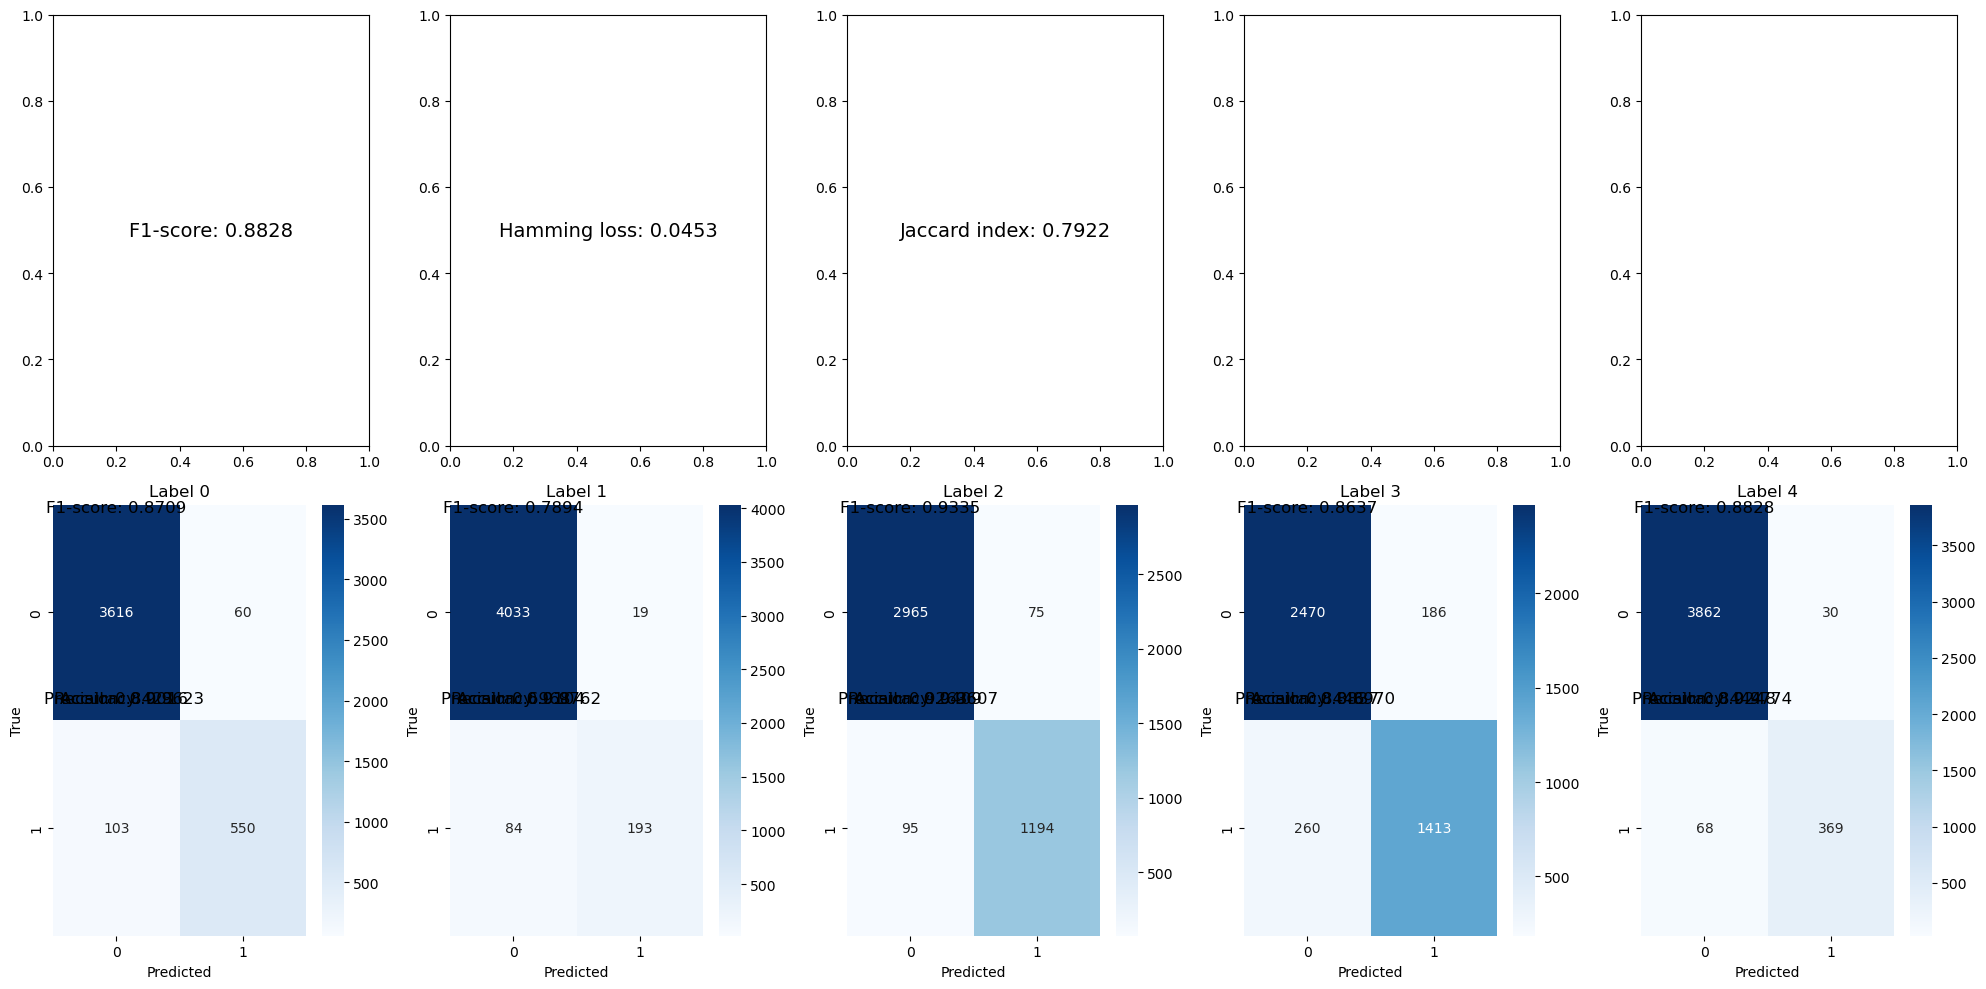

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, hamming_loss, jaccard_score

# Assuming you have already trained the classifier and made predictions
# X_train, X_test, y_train, y_test, y_pred should be defined

# Calculate overall metrics with detailed confusion matrix breakdowns
f1 = f1_score(y_test, y_pred, average='weighted')
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='weighted')

# Create a confusion matrix for each output and calculate specific metrics
num_labels = y_test.shape[1]
fig, axes = plt.subplots(2, num_labels, figsize=(20, 10))  # Adjust figsize as needed

# Overall metrics section
axes[0, 0].text(0.5, 0.5, f'F1-score: {f1:.4f}', ha='center', va='center', fontsize=14)
axes[0, 1].text(0.5, 0.5, f'Hamming loss: {hamming:.4f}', ha='center', va='center', fontsize=14)
axes[0, 2].text(0.5, 0.5, f'Jaccard index: {jaccard:.4f}', ha='center', va='center', fontsize=14)

# Confusion matrix section with additional metrics
for i in range(num_labels):
  cm = confusion_matrix(y_test[:, i], y_pred[:, i])
  sns.heatmap(cm, annot=True, fmt='d', ax=axes[1, i], cmap='Blues')
  axes[1, i].set_title(f'Label {i}')
  axes[1, i].set_xlabel('Predicted')
  axes[1, i].set_ylabel('True')

  # Calculate and display additional metrics per label (consider adding more as needed)
  tn, fp, fn, tp = cm.ravel()
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  precision = tp / (tp + fp) if tp + fp > 0 else 0
  recall = tp / (tp + fn) if tp + fn > 0 else 0
  f1_label = f1_score(y_test[:, i], y_pred[:, i])

  axes[1, i].text(0.05, 0.9, f'Accuracy: {accuracy:.4f}', ha='left', va='center', fontsize=12)
  axes[1, i].text(0.5, 0.9, f'Precision: {precision:.4f}', ha='center', va='center', fontsize=12)
  axes[1, i].text(0.95, 0.9, f'Recall: {recall:.4f}', ha='right', va='center', fontsize=12)
  axes[1, i].text(0.5, 0.05, f'F1-score: {f1_label:.4f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Implementation of LSTM

In [21]:
from keras.layers import LSTM


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, hamming_loss, jaccard_score
import tensorflow as tf  # Import tensorflow for sparse tensor reordering if needed

# ... your data preprocessing code (cleaning Telugu text, combining heading and body)

# Label encoding for multi-label classification
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['topic'].apply(lambda x: x.split(',')))
y_test = mlb.transform(test_data['topic'].apply(lambda x: x.split(',')))

# Text preprocessing and padding
# ... your previous code for data preprocessing and label encoding ...

# Text preprocessing and padding (assuming X_train is not a SparseTensor)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['combined_text'])
max_features = len(tokenizer.word_index) + 1

X_train_sequences = tokenizer.texts_to_sequences(train_data['combined_text'])
X_test_sequences = tokenizer.texts_to_sequences(test_data['combined_text'])

max_len = 50  # Adjust based on your data
X_train = pad_sequences(X_train_sequences, maxlen=max_len)
X_test = pad_sequences(X_test_sequences, maxlen=max_len)

# Create the LSTM model
embedding_dim = 100  # Define your embedding dimension
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, embedding_dim, input_length=max_len))
model_lstm.add(LSTM(64, return_sequences=True))  # Adjust number of units as needed
model_lstm.add(LSTM(32))  # Adjust number of units as needed
model_lstm.add(Dense(y_train.shape[1], activation='sigmoid'))  # Multi-label output with sigmoid activation

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

model_lstm.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model_lstm.predict(X_test)
cm = confusion_matrix( y_test, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5','6'], 
                     columns = ['1','2','3','4','5','6'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

y_pred = (y_pred > 0.5).astype(int)  # Threshold for binary classification

print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Hamming loss:", hamming_loss(y_test, y_pred))
print("Jaccard index:", jaccard_score(y_test, y_pred, average='weighted'))


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

541/541 ━━━━━━━━━━━━━━━━━━━━ 46s 83ms/step - accuracy: 0.4575 - loss: 0.4400 - val_accuracy: 0.8589 - val_loss: 0.1605
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

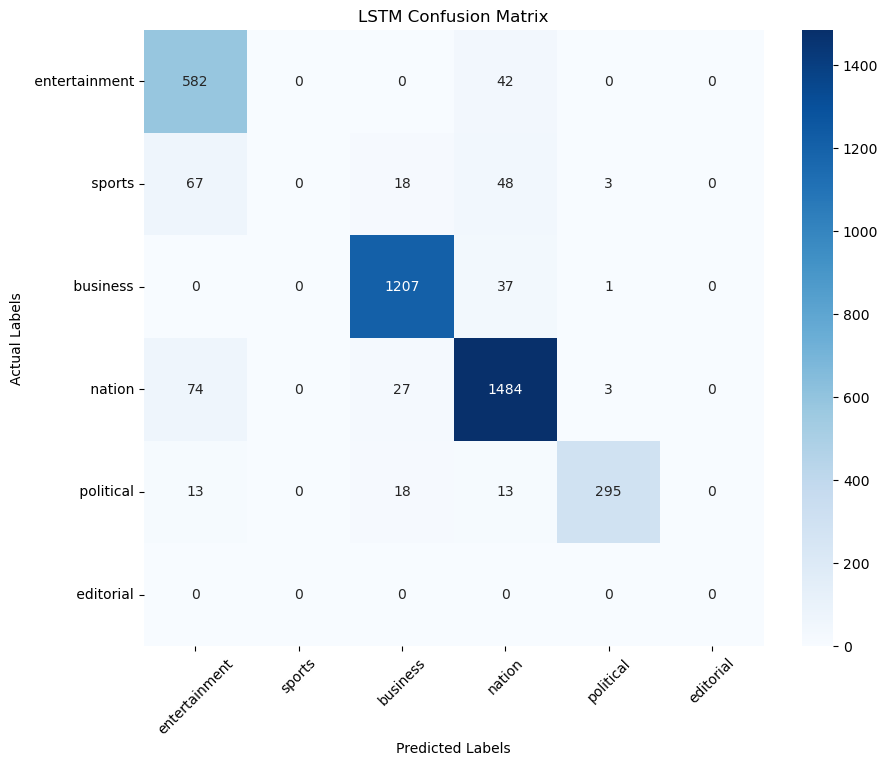

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the label names
label_names = ['entertainment', 'sports', 'business', 'nation', 'political', 'editorial']

# Convert predictions to binary
y_pred_binary = (y_pred > 0.5).astype(int)

# Initialize a 6x6 confusion matrix
num_labels = len(label_names)
conf_matrix = np.zeros((num_labels, num_labels))

# Populate the 6x6 confusion matrix
for i in range(num_labels):
    for j in range(num_labels):
        # Add check for missing labels in y_test or y_pred_binary
        if i < y_test.shape[1] and j < y_pred_binary.shape[1]:
            conf_matrix[i, j] = np.sum((y_test[:, i] == 1) & (y_pred_binary[:, j] == 1))

# Create a DataFrame for the 6x6 confusion matrix with label names
cm_df = pd.DataFrame(conf_matrix,
                     index=[f' {label}' for label in label_names],
                     columns=[f'{label}' for label in label_names])

# Plotting the 6x6 confusion matrix with integer formatting
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='.0f', cmap='Blues')  # Use 'fmt=".0f"' for integer display
plt.title('LSTM Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()




Label distribution in y_test (sum of each column):
entertainment: 653
sports: 277
business: 1289
nation: 1673
political: 437

Label distribution in y_pred_binary (sum of each column):
entertainment: 736
sports: 0
business: 1270
nation: 1624
political: 302


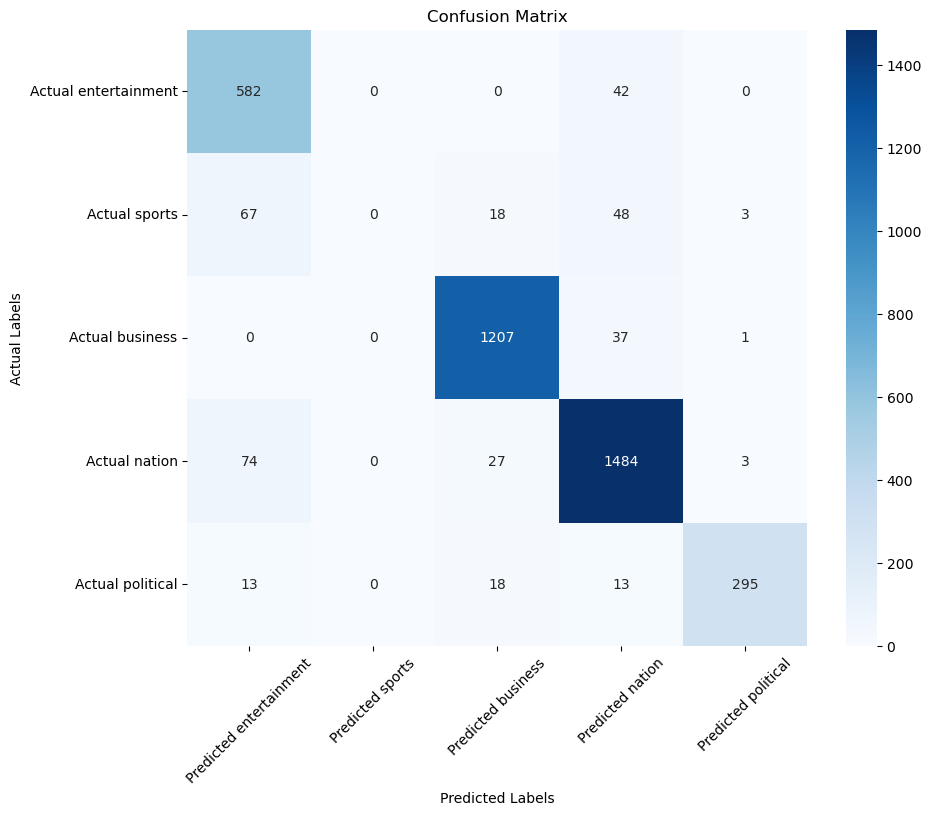


Evaluation Metrics:
F1-score: 0.8357888103752075
Hamming loss: 0.05197505197505198
Jaccard index: 0.7580152377646606


In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the label names
label_names = ['entertainment', 'sports', 'business', 'nation', 'political', 'editorial']

# Ensure y_test and y_pred_binary have the same shape as the label names
if y_test.shape[1] != len(label_names):
    print(f"Warning: Shape mismatch. Adjusting labels dynamically.")
    label_names = label_names[:y_test.shape[1]]

# Convert predictions to binary
y_pred_binary = (y_pred > 0.5).astype(int)

# Check the label distributions in y_test and y_pred_binary
print("\nLabel distribution in y_test (sum of each column):")
label_dist_y_test = {label: np.sum(y_test[:, i]) for i, label in enumerate(label_names)}
for label, count in label_dist_y_test.items():
    print(f"{label}: {count}")

print("\nLabel distribution in y_pred_binary (sum of each column):")
label_dist_y_pred = {label: np.sum(y_pred_binary[:, i]) for i, label in enumerate(label_names)}
for label, count in label_dist_y_pred.items():
    print(f"{label}: {count}")

# Initialize a confusion matrix dynamically based on label count
num_labels = len(label_names)
conf_matrix = np.zeros((num_labels, num_labels))

# Populate the confusion matrix
for i in range(num_labels):
    for j in range(num_labels):
        # Check bounds before accessing the arrays
        if i < y_test.shape[1] and j < y_pred_binary.shape[1]:
            conf_matrix[i, j] = np.sum((y_test[:, i] == 1) & (y_pred_binary[:, j] == 1))

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(conf_matrix,
                     index=[f'Actual {label}' for label in label_names],
                     columns=[f'Predicted {label}' for label in label_names])

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='.0f', cmap='Blues')  # Use 'fmt=".0f"' for integer display
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Print evaluation metrics
from sklearn.metrics import f1_score, hamming_loss, jaccard_score

print("\nEvaluation Metrics:")
print("F1-score:", f1_score(y_test, y_pred_binary, average='weighted'))
print("Hamming loss:", hamming_loss(y_test, y_pred_binary))
print("Jaccard index:", jaccard_score(y_test, y_pred_binary, average='weighted'))

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the label names
label_names = ['entertainment', 'sports', 'business', 'nation', 'political', 'editorial']

# Convert predictions to binary
y_pred_binary = (y_pred > 0.5).astype(int)

# Debugging: Check the label distribution in the test set and predictions
print("\nLabel distribution in y_test (sum of each column):")
label_dist_y_test = {label: np.sum(y_test[:, i]) for i, label in enumerate(label_names)}
for label, count in label_dist_y_test.items():
    print(f"{label}: {count}")

print("\nLabel distribution in y_pred_binary (sum of each column):")
label_dist_y_pred = {label: np.sum(y_pred_binary[:, i]) for i, label in enumerate(label_names)}
for label, count in label_dist_y_pred.items():
    print(f"{label}: {count}")

# Force all labels to be reflected in the confusion matrix
num_labels = len(label_names)
conf_matrix = np.zeros((num_labels, num_labels))

# Populate the confusion matrix
for i in range(num_labels):
    for j in range(num_labels):
        if i < y_test.shape[1] and j < y_pred_binary.shape[1]:
            conf_matrix[i, j] = np.sum((y_test[:, i] == 1) & (y_pred_binary[:, j] == 1))

# Create a DataFrame for the confusion matrix with label names
cm_df = pd.DataFrame(conf_matrix,
                     index=[f'Actual {label}' for label in label_names],
                     columns=[f'Predicted {label}' for label in label_names])

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='.0f', cmap='Blues')  # Use 'fmt=".0f"' for integer display
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Print evaluation metrics
from sklearn.metrics import f1_score, hamming_loss, jaccard_score

print("\nEvaluation Metrics:")
print("F1-score:", f1_score(y_test, y_pred_binary, average='weighted'))
print("Hamming loss:", hamming_loss(y_test, y_pred_binary))
print("Jaccard index:", jaccard_score(y_test, y_pred_binary, average='weighted'))


Label distribution in y_test (sum of each column):


IndexError: index 5 is out of bounds for axis 1 with size 5

In [23]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 50, 100)          │    24,611,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (32, 50, 64)           │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (32, 32)               │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 5)                │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,998,365 (282.28 MB)

 Trainable params: 24,666,121 (94.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,332,244 (188.19 MB)

In [24]:
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['topic'].apply(lambda x: x.split(',')))
y_test = mlb.transform(test_data['topic'].apply(lambda x: x.split(',')))

# Bi-LSTM Implementation


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, hamming_loss, jaccard_score
import tensorflow as tf

# Assuming you have data loaded in variables `data`, `train_data`, and `test_data`
# and have already cleaned and preprocessed your text data

# Label encoding for multi-label classification
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['topic'].apply(lambda x: x.split(',')))
y_test = mlb.transform(test_data['topic'].apply(lambda x: x.split(',')))

# Text preprocessing and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['combined_text'])
max_features = len(tokenizer.word_index) + 1

X_train_sequences = tokenizer.texts_to_sequences(train_data['combined_text'])
X_test_sequences = tokenizer.texts_to_sequences(test_data['combined_text'])

max_len = 50  # Adjust based on your data
X_train = pad_sequences(X_train_sequences, maxlen=max_len)
X_test = pad_sequences(X_test_sequences, maxlen=max_len)

# Define embedding dimension
embedding_dim = 100

# Create the Bidirectional LSTM model
model_bilstm = Sequential()
model_bilstm.add(Embedding(max_features, embedding_dim, input_length=max_len))
model_bilstm.add(Bidirectional(LSTM(64, return_sequences=True)))  # Adjust number of units as needed
model_bilstm.add(Bidirectional(LSTM(32)))  # Adjust number of units as needed
model_bilstm.add(Dense(y_train.shape[1], activation='sigmoid'))  # Multi-label output with sigmoid activation

model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()

model_bilstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model_bilstm.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Threshold for binary classification

print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Hamming loss:", hamming_loss(y_test, y_pred))
print("Jaccard index:", jaccard_score(y_test, y_pred, average='weighted'))


In [ ]:
model_bilstm.summary()

In [ ]:
#Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, hamming_loss, jaccard_score

# Assuming you have already trained the classifier and made predictions
# X_train, X_test, y_train, y_test, y_pred should be defined

# Calculate overall metrics
f1 = f1_score(y_test, y_pred, average='weighted')
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='weighted')

# Create a bar chart for the overall metrics
metrics = {'F1-score': f1, 'Hamming loss': hamming, 'Jaccard index': jaccard}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red'])
plt.title('Overall Metrics')
plt.ylabel('Score')
plt.show()

# Generate confusion matrices for each output
num_labels = y_test.shape[1]
fig, axes = plt.subplots(1, num_labels, figsize=(15, 5))

for i in range(num_labels):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Label {i}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, hamming_loss, jaccard_score

# Assuming you have already trained the classifier and made predictions
# X_train, X_test, y_train, y_test, y_pred should be defined

# Calculate overall metrics with detailed confusion matrix breakdowns
f1 = f1_score(y_test, y_pred, average='weighted')
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='weighted')

# Create a confusion matrix for each output and calculate specific metrics
num_labels = y_test.shape[1]
fig, axes = plt.subplots(2, num_labels, figsize=(20, 10))  # Adjust figsize as needed

# Overall metrics section
axes[0, 0].text(0.5, 0.5, f'F1-score: {f1:.4f}', ha='center', va='center', fontsize=14)
axes[0, 1].text(0.5, 0.5, f'Hamming loss: {hamming:.4f}', ha='center', va='center', fontsize=14)
axes[0, 2].text(0.5, 0.5, f'Jaccard index: {jaccard:.4f}', ha='center', va='center', fontsize=14)

# Confusion matrix section with additional metrics
for i in range(num_labels):
  cm = confusion_matrix(y_test[:, i], y_pred[:, i])
  sns.heatmap(cm, annot=True, fmt='d', ax=axes[1, i], cmap='Blues')
  axes[1, i].set_title(f'Label {i}')
  axes[1, i].set_xlabel('Predicted')
  axes[1, i].set_ylabel('True')

  # Calculate and display additional metrics per label (consider adding more as needed)
  tn, fp, fn, tp = cm.ravel()
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  precision = tp / (tp + fp) if tp + fp > 0 else 0
  recall = tp / (tp + fn) if tp + fn > 0 else 0
  f1_label = f1_score(y_test[:, i], y_pred[:, i])

  axes[1, i].text(0.05, 0.9, f'Accuracy: {accuracy:.4f}', ha='left', va='center', fontsize=12)
  axes[1, i].text(0.5, 0.9, f'Precision: {precision:.4f}', ha='center', va='center', fontsize=12)
  axes[1, i].text(0.95, 0.9, f'Recall: {recall:.4f}', ha='right', va='center', fontsize=12)
  axes[1, i].text(0.5, 0.05, f'F1-score: {f1_label:.4f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, hamming_loss, jaccard_score

# Assuming you have already trained the classifier and made predictions
# X_train, X_test, y_train, y_test, y_pred should be defined

# Calculate overall metrics with detailed confusion matrix breakdowns
f1 = f1_score(y_test, y_pred, average='weighted')
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='weighted')

# Create a confusion matrix for each output and calculate specific metrics
num_labels = y_test.shape[1]
fig, axes = plt.subplots(2, num_labels, figsize=(20, 10))  # Adjust figsize as needed

# Overall metrics section
axes[0, 0].text(0.5, 0.5, f'F1-score: {f1:.4f}', ha='center', va='center', fontsize=14)
axes[0, 1].text(0.5, 0.5, f'Hamming loss: {hamming:.4f}', ha='center', va='center', fontsize=14)
axes[0, 2].text(0.5, 0.5, f'Jaccard index: {jaccard:.4f}', ha='center', va='center', fontsize=14)

# Confusion matrix section with additional metrics
for i in range(num_labels):
  cm = confusion_matrix(y_test[:, i], y_pred[:, i])
  sns.heatmap(cm, annot=True, fmt='d', ax=axes[1, i], cmap='Blues')
  axes[1, i].set_title(f'Label {i}')
  axes[1, i].set_xlabel('Predicted')
  axes[1, i].set_ylabel('True')

  # Calculate and display additional metrics per label (consider adding more as needed)
  tn, fp, fn, tp = cm.ravel()
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  precision = tp / (tp + fp) if tp + fp > 0 else 0
  recall = tp / (tp + fn) if tp + fn > 0 else 0
  f1_label = f1_score(y_test[:, i], y_pred[:, i])

  axes[1, i].text(0.05, 0.9, f'Accuracy: {accuracy:.4f}', ha='left', va='center', fontsize=12)
  axes[1, i].text(0.5, 0.9, f'Precision: {precision:.4f}', ha='center', va='center', fontsize=12)
  axes[1, i].text(0.95, 0.9, f'Recall: {recall:.4f}', ha='right', va='center', fontsize=12)
  axes[1, i].text(0.5, 0.05, f'F1-score: {f1_label:.4f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# CNN Implementation


In [ ]:
!pip install tensorflow
!pip install tensorflow-hub
!pip install tensorflow-text
!pip install --upgrade tensorflow keras
!pip install --upgrade transformers
!pip install --upgrade keras
!pip install tensorflow==2.17.0 transformers==4.32.0
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences




In [ ]:
# Assuming you have a list of text data
text_data = train_data['combined_text'].tolist()

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Padding
max_length = 100  # Adjust max_length as needed
padded_sequences = pad_sequences(sequences, maxlen=max_length)
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer for multi-label classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(padded_sequences, y_train, epochs=10, batch_size=32, validation_split=0.2)




In [ ]:
import matplotlib.pyplot as plt

# Accuracy data
train_accuracy_3 = [0.6786, 0.9737, 0.9929, 0.9972, 0.9989, 0.9985, 0.9991, 0.9994, 0.9989, 0.9896]
val_accuracy_3 = [0.9327, 0.9344, 0.9451, 0.9469, 0.9443, 0.9448, 0.9437, 0.9440, 0.9229, 0.9391]
epochs_3 = list(range(1, 11))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(epochs_3, train_accuracy_3, label='Train Accuracy', marker='o')
plt.plot(epochs_3, val_accuracy_3, label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, hamming_loss, jaccard_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have data loaded in `data`, `train_data`, and `test_data`
# with the following columns: 'combined_text' and 'topic'

# Label encoding for multi-label classification
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['topic'].apply(lambda x: x.split(',')))
y_test = mlb.transform(test_data['topic'].apply(lambda x: x.split(',')))

# Text preprocessing and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['combined_text'])
max_features = len(tokenizer.word_index) + 1  # Vocabulary size

X_train_sequences = tokenizer.texts_to_sequences(train_data['combined_text'])
X_test_sequences = tokenizer.texts_to_sequences(test_data['combined_text'])

max_len = 50  # Maximum sequence length
X_train = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')

# Define embedding dimension
embedding_dim = 100

# Create the CNN model
model_cnn = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len),  # Embedding layer
    Conv1D(filters=128, kernel_size=3, activation='relu'),  # Convolutional layer
    GlobalMaxPooling1D(),  # Global Max Pooling layer
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(y_train.shape[1], activation='sigmoid')  # Output layer for multi-label classification
])

# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

# Train the model
model_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model_cnn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Threshold for binary classification

# Print evaluation metrics
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Hamming loss:", hamming_loss(y_test, y_pred))
print("Jaccard index:", jaccard_score(y_test, y_pred, average='samples'))  # Use 'samples' for multi-label

# Ensure compatibility with other tools

In [ ]:
#Visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, hamming_loss, jaccard_score

# Assuming you have already trained the classifier and made predictions
# X_train, X_test, y_train, y_test, y_pred should be defined

# Calculate overall metrics
f1 = f1_score(y_test, y_pred, average='weighted')
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='weighted')

# Create a bar chart for the overall metrics
metrics = {'F1-score': f1, 'Hamming loss': hamming, 'Jaccard index': jaccard}
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red'])
plt.title('Overall Metrics')
plt.ylabel('Score')
plt.show()

# Generate confusion matrices for each output
num_labels = y_test.shape[1]
fig, axes = plt.subplots(1, num_labels, figsize=(15, 5))

for i in range(num_labels):
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Label {i}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, hamming_loss, jaccard_score

# Assuming you have already trained the classifier and made predictions
# X_train, X_test, y_train, y_test, y_pred should be defined

# Calculate overall metrics with detailed confusion matrix breakdowns
f1 = f1_score(y_test, y_pred, average='weighted')
hamming = hamming_loss(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred, average='weighted')

# Create a confusion matrix for each output and calculate specific metrics
num_labels = y_test.shape[1]
fig, axes = plt.subplots(2, num_labels, figsize=(20, 10))  # Adjust figsize as needed

# Overall metrics section
axes[0, 0].text(0.5, 0.5, f'F1-score: {f1:.4f}', ha='center', va='center', fontsize=14)
axes[0, 1].text(0.5, 0.5, f'Hamming loss: {hamming:.4f}', ha='center', va='center', fontsize=14)
axes[0, 2].text(0.5, 0.5, f'Jaccard index: {jaccard:.4f}', ha='center', va='center', fontsize=14)

# Confusion matrix section with additional metrics
for i in range(num_labels):
  cm = confusion_matrix(y_test[:, i], y_pred[:, i])
  sns.heatmap(cm, annot=True, fmt='d', ax=axes[1, i], cmap='Blues')
  axes[1, i].set_title(f'Label {i}')
  axes[1, i].set_xlabel('Predicted')
  axes[1, i].set_ylabel('True')

  # Calculate and display additional metrics per label (consider adding more as needed)
  tn, fp, fn, tp = cm.ravel()
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  precision = tp / (tp + fp) if tp + fp > 0 else 0
  recall = tp / (tp + fn) if tp + fn > 0 else 0
  f1_label = f1_score(y_test[:, i], y_pred[:, i])

  axes[1, i].text(0.05, 0.9, f'Accuracy: {accuracy:.4f}', ha='left', va='center', fontsize=12)
  axes[1, i].text(0.5, 0.9, f'Precision: {precision:.4f}', ha='center', va='center', fontsize=12)
  axes[1, i].text(0.95, 0.9, f'Recall: {recall:.4f}', ha='right', va='center', fontsize=12)
  axes[1, i].text(0.5, 0.05, f'F1-score: {f1_label:.4f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:

test_text_data = test_data['combined_text'].tolist()
test_sequences = tokenizer.texts_to_sequences(test_text_data)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length)

# Get predictions (probabilities for each label)
y_pred = model.predict(test_padded_sequences)


In [ ]:
n_labels = y_pred.shape[1]  # Number of labels in the multi-label problem

for i in range(n_labels):
  # Get true labels and predicted probabilities for the current label
  y_true = y_test[:, i]
  y_pred_proba = y_pred[:, i]

  # Calculate ROC curve
  fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  # Plot the ROC curve (optional)
  plt.figure(figsize=(6, 6))
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('ROC Curve for Label ' + str(i+1))
  plt.legend(loc="lower right")
  plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions on the validation set
y_pred = model.predict(padded_sequences)

# Step 2: Binarize the predictions (threshold = 0.5)
y_pred_binarized = (y_pred > 0.5).astype(int)

# Step 3: Calculate the confusion matrix for each label
conf_matrix = multilabel_confusion_matrix(y_train, y_pred_binarized)

# Step 4: Visualize the confusion matrix for each label
for i, matrix in enumerate(conf_matrix):
    plt.figure(figsize=(5, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Label {i+1}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Optional: Classification report
print(classification_report(y_train, y_pred_binarized))

In [ ]:
##LSTM Prediction

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, hamming_loss, jaccard_score
import pandas as pd
import numpy as np

# Assume train_data and test_data are already loaded (dataframes with 'combined_text' and 'topic' columns)

# Label encoding for multi-label classification
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['topic'].apply(lambda x: x.split(',')))
y_test = mlb.transform(test_data['topic'].apply(lambda x: x.split(',')))

# Text preprocessing and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['combined_text'])

max_features = len(tokenizer.word_index) + 1
max_len = 50  # Adjust based on your data

X_train_sequences = tokenizer.texts_to_sequences(train_data['combined_text'])
X_test_sequences = tokenizer.texts_to_sequences(test_data['combined_text'])

X_train = pad_sequences(X_train_sequences, maxlen=max_len)
X_test = pad_sequences(X_test_sequences, maxlen=max_len)

# Create the LSTM model
embedding_dim = 100
model = Sequential([
    Embedding(max_features, embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(y_train.shape[1], activation='sigmoid')  # Multi-label output with sigmoid activation
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Threshold for binary classification

# Metrics
print("F1-score:", f1_score(y_test, y_pred_binary, average='weighted'))
print("Hamming loss:", hamming_loss(y_test, y_pred_binary))
print("Jaccard index:", jaccard_score(y_test, y_pred_binary, average='weighted'))

# Inverse topic dictionary for decoding predictions
inv_topic_dict = {index: label for index, label in enumerate(mlb.classes_)}

# Prediction function
def predict_text_sample(test_text, tokenizer, model, max_len, inv_topic_dict):
    # Tokenize and pad the test text
    test_sequence = tokenizer.texts_to_sequences([test_text])
    test_padded = pad_sequences(test_sequence, maxlen=max_len)

    # Predict the labels
    y_pred_sample = model.predict(test_padded)
    y_pred_classes = (y_pred_sample > 0.5).astype(int)

    # Map indices to topics
    predicted_labels = [inv_topic_dict[i] for i in range(len(y_pred_classes[0])) if y_pred_classes[0][i] == 1]
    return predicted_labels

# Example input
test_text = "ఇండియన్ స్క్రీన్ మీద పోటీ పడటం అయిపోయింది అందుకే ఇప్పుడు మన సినిమాలు ఫారిన్ రిలీజ్ లో పోటీ పడుతున్నాయి. " \
            "ఇండియన్ సినిమాలు ముఖ్యంగా సౌత్ సినిమాలు రిలీజ్ అవుతున్నాయి అంటే వరల్డ్ వైడ్ మార్కెట్ ఓపెన్ అవుతుంది. " \
            "తెలుగు తమిళ హిందీ భాషల సినిమాలు సబ్ టైటిల్స్ తో విధేశాల్లో కూడా రిలీజ్ అవుతున్నాయి"

predicted_classes = predict_text_sample(test_text, tokenizer, model, max_len, inv_topic_dict)
print("Predicted classes:", predicted_classes)

In [ ]:
import matplotlib.pyplot as plt

# Accuracy data
train_accuracy = [0.4442, 0.8351, 0.9766, 0.9931, 0.9979, 0.9986, 0.9984, 0.9992, 0.9996, 0.9998]
val_accuracy = [0.7397, 0.9185, 0.9233, 0.9205, 0.9222, 0.9143, 0.9180, 0.9191, 0.9164, 0.9159]
epochs = list(range(1, 11))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
##Bi-LSTM Prediction


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, hamming_loss, jaccard_score
import numpy as np

# Label encoding for multi-label classification
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_data['topic'].apply(lambda x: x.split(',')))
y_test = mlb.transform(test_data['topic'].apply(lambda x: x.split(',')))

# Text preprocessing and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['combined_text'])
max_features = len(tokenizer.word_index) + 1

X_train_sequences = tokenizer.texts_to_sequences(train_data['combined_text'])
X_test_sequences = tokenizer.texts_to_sequences(test_data['combined_text'])

max_len = 50  # Adjust based on your data
X_train = pad_sequences(X_train_sequences, maxlen=max_len)
X_test = pad_sequences(X_test_sequences, maxlen=max_len)

# Define embedding dimension
embedding_dim = 100

# Create the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Adjust number of units as needed
model.add(Bidirectional(LSTM(32)))  # Adjust number of units as needed
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Multi-label output with sigmoid activation

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Threshold for binary classification

print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Hamming loss:", hamming_loss(y_test, y_pred))
print("Jaccard index:", jaccard_score(y_test, y_pred, average='weighted'))

# Function to predict a single text sample
def predict_text_sample(test_text, model, tokenizer, max_len, mlb):
    # Preprocess the text
    test_sequence = tokenizer.texts_to_sequences([test_text])
    test_padded = pad_sequences(test_sequence, maxlen=max_len)
    
    # Predict the classes
    y_pred_sample = model.predict(test_padded)
    y_pred_sample = (y_pred_sample > 0.5).astype(int)
    
    # Convert predictions to topic labels
    predicted_classes = mlb.inverse_transform(y_pred_sample)
    return predicted_classes

# Sample text for prediction
test_text = (
    "గుకేశ్, మను భాకర్‌ సహా నలుగురికి ఖేల్‌రత్న.. తెలుగమ్మాయి జ్యోతి సహా 32 మందికి అర్జున పురస్కారాలు "
    "బూమ్ బూమ్.. బుమ్రా.. ఐసీసీ టెస్టు ర్యాంకింగ్స్‌లో ఎవరికీ అందనంత ఎత్తులో..! "
    "గంభీర్ పట్టుబట్టినా ఆస్ట్రేలియాతో టెస్టులకు పుజారాను ఎంపిక చేయని సెలక్టర్లు..!"
)

# Get predictions for the sample text
predicted_classes = predict_text_sample(test_text, model, tokenizer, max_len, mlb)
print("Predicted classes are:", predicted_classes)

In [ ]:
import matplotlib.pyplot as plt

# Accuracy data
train_accuracy_2 = [0.5851, 0.9651, 0.9907, 0.9969, 0.9979, 0.9990, 0.9995, 0.9999, 0.9998, 0.9994]
val_accuracy_2 = [0.9166, 0.9185, 0.9205, 0.9178, 0.9196, 0.9210, 0.9240, 0.9189, 0.9178, 0.9113]
epochs_2 = list(range(1, 11))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(epochs_2, train_accuracy_2, label='Train Accuracy', marker='o')
plt.plot(epochs_2, val_accuracy_2, label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
    ####Comparison of all models 
    import matplotlib.pyplot as plt

# LSTM data
train_accuracy_lstm = [0.4442, 0.8351, 0.9766, 0.9931, 0.9979, 0.9986, 0.9984, 0.9992, 0.9996, 0.9998]
val_accuracy_lstm = [0.7397, 0.9185, 0.9233, 0.9205, 0.9222, 0.9143, 0.9180, 0.9191, 0.9164, 0.9159]

# BiLSTM data
train_accuracy_bilstm = [0.5851, 0.9651, 0.9907, 0.9969, 0.9979, 0.9990, 0.9995, 0.9999, 0.9998, 0.9994]
val_accuracy_bilstm = [0.9166, 0.9185, 0.9205, 0.9178, 0.9196, 0.9210, 0.9240, 0.9189, 0.9178, 0.9113]

# CNN data
train_accuracy_cnn = [0.6786, 0.9737, 0.9929, 0.9972, 0.9989, 0.9985, 0.9991, 0.9994, 0.9989, 0.9896]
val_accuracy_cnn = [0.9327, 0.9344, 0.9451, 0.9469, 0.9443, 0.9448, 0.9437, 0.9440, 0.9229, 0.9391]

epochs = list(range(1, 11))

# Plotting
plt.figure(figsize=(10, 8))

# LSTM
plt.plot(epochs, train_accuracy_lstm, label='Train Accuracy (LSTM)', marker='o')
plt.plot(epochs, val_accuracy_lstm, label='Validation Accuracy (LSTM)', marker='s')

# BiLSTM
plt.plot(epochs, train_accuracy_bilstm, label='Train Accuracy (BiLSTM)', marker='^')
plt.plot(epochs, val_accuracy_bilstm, label='Validation Accuracy (BiLSTM)', marker='d')

# CNN
plt.plot(epochs, train_accuracy_cnn, label='Train Accuracy (CNN)', marker='v')
plt.plot(epochs, val_accuracy_cnn, label='Validation Accuracy (CNN)', marker='x')

plt.title('Epochs vs Accuracy (LSTM, BiLSTM, and CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Check a sample of data
print("Sample X_train:", X_train[0])
print("Sample y_train:", y_train[0])

# Ensure no empty sequences
print("Empty sequences in X_train:", (X_train == 0).all(axis=1).sum())

In [ ]:
for layer in model.layers:
    print("Layer Name:", layer.name)
    print("Output Shape:", layer.output_shape)
    print("Number of Parameters:", layer.count_params())
    print("-" * 50)

In [ ]:
model

In [ ]:
# Display the summary of the LSTM model architecture
print("LSTM Model Architecture Summary:")
model.summary()